In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import math
from textblob import TextBlob as tb
import numpy as np

In [3]:
def tf(word, doc):
 return doc.words.count(word) / len(doc.words)

In [4]:
def n_contain(word, doclist):
 return sum(1 for doc in doclist if word in blob.words)

In [5]:
def idf(word, doclist):
 return math.log(len(doclist) / (1 + n_contain(word, doclist)))

In [6]:
def tfidf(word, doc, doclist):
 return tf(word, doc) * idf(word, doclist)

In [7]:
doc1 = tb("""TensorFlow is an open source software library for machine learning across a range of tasks, and developed by Google to meet their needs for systems capable of building and training neural networks to detect and decipher patterns and correlations, analogous to the learning and reasoning which humans use""")
doc2 = tb("""It is currently used for both research and production at Google products,‍ often replacing the role of its closed-source predecessor, DistBelief. TensorFlow was originally developed by the Google Brain team for internal Google use before being released under the Apache 2.0 open source license on November 9, 2015""")
doc3 = tb("""Starting in 2011, Google Brain built DistBelief as a proprietary machine learning system based on deep learning neural networks. Its use grew rapidly across diverse Alphabet companies in both research and commercial applications""")
blobList = [doc1, doc2, doc3]

In [8]:
import nltk
nltk.download('punkt')
for i, blob in enumerate(blobList):
    print("Top words in document {}".format(i+1))
    scores = {word: tfidf(word, blob, blobList) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:5]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 10)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Test.PPMUMCPU0034\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!
Top words in document 1
	Word: TensorFlow, TF-IDF: -0.0059933765
	Word: is, TF-IDF: -0.0059933765
	Word: an, TF-IDF: -0.0059933765
	Word: open, TF-IDF: -0.0059933765
	Word: source, TF-IDF: -0.0059933765
Top words in document 2
	Word: It, TF-IDF: -0.0058710627
	Word: is, TF-IDF: -0.0058710627
	Word: currently, TF-IDF: -0.0058710627
	Word: used, TF-IDF: -0.0058710627
	Word: both, TF-IDF: -0.0058710627
Top words in document 3
	Word: Starting, TF-IDF: -0.0087176386
	Word: 2011, TF-IDF: -0.0087176386
	Word: Google, TF-IDF: -0.0087176386
	Word: Brain, TF-IDF: -0.0087176386
	Word: built, TF-IDF: -0.0087176386


Implementing a TF-IDF model for spam
prediction

In [9]:
import tensorflow as tf # TensorFlow
import matplotlib.pyplot as plt # For matplotlib for plotting 
import csv # For parsing and preprcessing CSV file 
import numpy as np # For the NumPy array 
import os # For the regular OS support
import string # For string manipulation 
import requests # For handling HTTP request 
import io # For the I/O operation 
import nltk # For the nltk and its pre-trained toxkenizer models
from nltk.corpus import stopwords # For removing stop-words
from nltk import word_tokenize,sent_tokenize # For the nltk and its pre-trained toxkenizer models
from zipfile import ZipFile # For handling zipped files 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # TF_IDF 
from tensorflow.python.framework import ops # For TensorFlow python framework 
ops.reset_default_graph() # reset the deafult graph setting 

from tensorflow.python.framework import ops
import random


In [10]:
sess = tf.Session()

batch_size = 200
max_features = 1000

In [11]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [12]:
save_file_name = os.path.join('C:/Users/Test.PPMUMCPU0034/Desktop/Tensorflow/Section 6/temp','temp_spam_data.csv')

if not os.path.exists('C:/Users/Test.PPMUMCPU0034/Desktop/Tensorflow/Section 6/temp'):
    os.makedirs('C:/Users/Test.PPMUMCPU0034/Desktop/Tensorflow/Section 6/temp')
else:
    zip_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
    r = requests.get(zip_url)
    z = ZipFile(io.BytesIO(r.content))
    file = z.read('SMSSpamCollection')
    # Format Data
    text_data = file.decode()
    text_data = text_data.encode('ascii',errors='ignore')
    text_data = text_data.decode().split('\n')
    text_data = [x.split('\t') for x in text_data if len(x)>=1]
    
    # And write to csv
    with open(save_file_name, 'w') as temp_output_file:
        writer = csv.writer(temp_output_file)
        writer.writerows(text_data)

In [13]:
texts = [x[1] for x in text_data]
target = [x[0] for x in text_data]

In [14]:
target = [1. if x=='spam' else 0. for x in target]

In [15]:
texts = [x.lower() for x in texts]

In [16]:
texts = [''.join(c for c in x if c not in string.punctuation) for x in texts]

In [17]:
texts = [''.join(c for c in x if c not in '0123456789') for x in texts]

In [18]:
texts = [' '.join(x.split()) for x in texts]

In [19]:
def tokenizer(text):
    words = nltk.word_tokenize(text)
    return words

In [20]:
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', max_features=max_features)
sparse_tfidf_texts = tfidf.fit_transform(texts)

In [21]:
train_indices = np.random.choice(sparse_tfidf_texts.shape[0], round(0.75*sparse_tfidf_texts.shape[0]), replace=False)
test_indices = np.array(list(set(range(sparse_tfidf_texts.shape[0])) - set(train_indices)))
texts_train = sparse_tfidf_texts[train_indices]
texts_test = sparse_tfidf_texts[test_indices]
target_train = np.array([x for ix, x in enumerate(target) if ix in train_indices])
target_test = np.array([x for ix, x in enumerate(target) if ix in test_indices])

In [22]:
A = tf.Variable(tf.random_normal(shape=[max_features,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [23]:
x_data = tf.placeholder(shape=[None, max_features], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [24]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [25]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

In [26]:
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [27]:
train_op = tf.train.GradientDescentOptimizer(0.01)
train_step = train_op.minimize(loss)

In [28]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [29]:
train_loss = []
test_loss = []
train_acc = []
test_acc = []
i_data = []

In [30]:
for i in range(10000):
    rand_index = np.random.choice(texts_train.shape[0], size=batch_size)
    rand_x = texts_train[rand_index].todense()
    rand_y = np.transpose([target_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    # Only record loss and accuracy every 100 generations
    if (i+1)%100==0:
        i_data.append(i+1)
        train_loss_temp = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        train_loss.append(train_loss_temp)
        
        test_loss_temp = sess.run(loss, feed_dict={x_data: texts_test.todense(), y_target: target_test.reshape(-1,1)})
        test_loss.append(test_loss_temp)
        
        train_acc_temp = sess.run(accuracy, feed_dict={x_data: rand_x, y_target: rand_y})
        train_acc.append(train_acc_temp)
    
        test_acc_temp = sess.run(accuracy, feed_dict={x_data: texts_test.todense(), y_target: target_test.reshape(-1,1)})
        test_acc.append(test_acc_temp)
    if (i+1)%500==0:
        acc_and_loss = [i+1, train_loss_temp, test_loss_temp, train_acc_temp, test_acc_temp]
        acc_and_loss = [np.round(x,2) for x in acc_and_loss]
        print('Iteration # {}. Train Loss (Test Loss): {:.2f} ({:.2f}). Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))

Iteration # 500. Train Loss (Test Loss): 0.45 (0.48). Train Acc (Test Acc): 0.82 (0.82)
Iteration # 1000. Train Loss (Test Loss): 0.41 (0.46). Train Acc (Test Acc): 0.86 (0.84)
Iteration # 1500. Train Loss (Test Loss): 0.45 (0.46). Train Acc (Test Acc): 0.84 (0.85)
Iteration # 2000. Train Loss (Test Loss): 0.42 (0.46). Train Acc (Test Acc): 0.88 (0.86)
Iteration # 2500. Train Loss (Test Loss): 0.38 (0.46). Train Acc (Test Acc): 0.88 (0.86)
Iteration # 3000. Train Loss (Test Loss): 0.36 (0.46). Train Acc (Test Acc): 0.88 (0.86)
Iteration # 3500. Train Loss (Test Loss): 0.43 (0.46). Train Acc (Test Acc): 0.86 (0.86)
Iteration # 4000. Train Loss (Test Loss): 0.49 (0.46). Train Acc (Test Acc): 0.82 (0.86)
Iteration # 4500. Train Loss (Test Loss): 0.45 (0.45). Train Acc (Test Acc): 0.84 (0.86)
Iteration # 5000. Train Loss (Test Loss): 0.49 (0.45). Train Acc (Test Acc): 0.82 (0.86)
Iteration # 5500. Train Loss (Test Loss): 0.46 (0.45). Train Acc (Test Acc): 0.85 (0.86)
Iteration # 6000. Trai

In [31]:
print('\nOverall accuracy on the training set (%): {}'.format(np.mean(train_acc)*100.0))
print('Overall accuracy on the test set (%): {}'.format(np.mean(test_acc)*100.0))


Overall accuracy on the training set (%): 84.2699944972992
Overall accuracy on the test set (%): 85.76399087905884


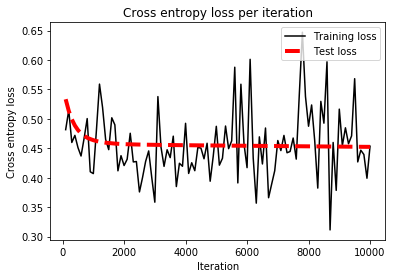

In [32]:
plt.plot(i_data, train_loss, 'k-', label='Training loss')
plt.plot(i_data, test_loss, 'r--', label='Test loss', linewidth=4)
plt.title('Cross entropy loss per iteration')
plt.xlabel('Iteration')
plt.ylabel('Cross entropy loss')
plt.legend(loc='upper right')
plt.show()

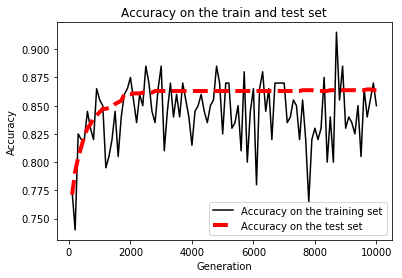

In [33]:
plt.plot(i_data, train_acc, 'k-', label='Accuracy on the training set')
plt.plot(i_data, test_acc, 'r--', label='Accuracy on the test set', linewidth=4)
plt.title('Accuracy on the train and test set')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()